In [12]:
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import healpy as hp
from astropy.coordinates import spherical_to_cartesian
import numpy as np
import scipy
from astropy.cosmology import WMAP9
from astropy.table import Table
from astroquery.vizier import Vizier
import astropy.units as u
import astropy.constants as c
from scipy.special import gammaincinv
import pickle
from sky_tiling import galaxy_informed_tiling

In [13]:
cat = Table.read("data/NEDLVS_20210922_v2_modified.fits")
cat

objname,ra,dec,objtype,z,z_unc,z_tech,z_qual,z_qual_flag,z_refcode,ziDist,ziDist_unc,ziDist_method,ziDist_indicator,ziDist_refcode,DistMpc,DistMpc_unc,DistMpc_method,ebv,A_FUV_MWext,A_NUV_MWext,A_J_MWext,A_H_MWext,A_Ks_MWext,A_W1_MWext,A_W2_MWext,A_W3_MWext,A_W4_MWext,m_FUV,m_FUV_unc,m_NUV,m_NUV_unc,Lum_FUV,Lum_FUV_unc,Lum_NUV,Lum_NUV_unc,GALEXphot,m_J,m_J_unc,m_H,m_H_unc,m_Ks,m_Ks_unc,Lum_J,Lum_J_unc,Lum_H,Lum_H_unc,Lum_Ks,Lum_Ks_unc,tMASSphot,m_W1,m_W1_unc,m_W2,m_W2_unc,m_W3,m_W3_unc,m_W4,m_W4_unc,Lum_W1,Lum_W1_unc,Lum_W2,Lum_W2_unc,Lum_W3,Lum_W3_unc,Lum_W4,Lum_W4_unc,WISEphot,SFR_W4,SFR_W4_unc,SFR_hybrid,SFR_hybrid_unc,ET_flag,Mstar,Mstar_unc,MLratio,WINTER_tile_index,DECam_tile_index,Rubin_tile_index,ZTF_tile_index,Roman_tile_index
bytes30,float64,float64,bytes6,float32,float32,bytes4,bool,bool,bytes19,float64,float64,bytes30,bytes1,bytes19,float32,float32,bytes30,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,bytes5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,bytes5,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float64,float64,bool,float64,float64,float32,float64,float64,float64,float64,float64
UGC 00002,0.60808,44.92089,G,6.258e-02,--,PHOT,False,False,2014ApJS..210....9B,--,--,--,--,--,282.33,--,Redshift,0.0809,0.648,0.727,0.066,0.041,0.028,0.016,0.011,0.004,0.002,--,--,--,--,--,--,--,--,--,13.577,0.083,12.717,0.094,12.445,0.108,1.4540e+44,1.1115e+43,1.4979e+44,1.2969e+43,9.5327e+43,9.4827e+42,XSC,12.088,0.008,11.948,0.018,8.604,0.017,7.097,0.131,3.9156e+43,2.8852e+41,1.7926e+43,2.9720e+41,2.8449e+43,4.4546e+41,1.5723e+43,1.8971e+42,APER,3.0717e+00,3.7063e-01,--,--,False,1.2391e+11,9.1305e+08,0.5000,35088.0,11815.0,3742.0,777.0,125454.0
KUG 2359+213,0.61296,21.58786,G,2.759e-02,4.3000e-05,None,False,False,1993AJ....105.1271G,--,--,--,--,--,121.35,0.19,Redshift,0.0414,0.332,0.372,0.034,0.021,0.014,0.008,0.006,0.002,0.001,18.322,0.019,17.954,0.010,8.0539e+42,1.3839e+41,7.8486e+42,7.0966e+40,MSC,14.286,0.105,13.614,0.136,13.457,0.182,1.3574e+43,1.3127e+42,1.1893e+43,1.4897e+42,6.8472e+42,1.1478e+42,XSC,12.910,0.018,12.990,0.076,9.950,0.198,8.270,0.319,3.3686e+42,5.5848e+40,1.2621e+42,8.8346e+40,1.5185e+42,2.7693e+41,9.8510e+41,2.8944e+41,APER,1.9245e-01,5.6546e-02,5.2536e-01,5.0140e-02,False,1.0660e+10,1.7673e+08,0.5000,28188.0,9418.0,2883.0,562.0,100527.0
MCG -01-01-024,0.64504,-3.71072,G,2.156e-02,7.0000e-06,None,False,False,2005ApJS..160..149S,100.35,2.60,Wavg,S,Mix,100.35,2.60,zIndependent,0.0336,0.269,0.302,0.027,0.017,0.012,0.007,0.005,0.002,0.001,--,--,16.580,0.007,--,--,1.7826e+43,1.1503e+41,MSC,11.893,0.030,11.265,0.044,10.836,0.051,8.3613e+43,2.3104e+42,7.0502e+43,2.8572e+42,5.2208e+43,2.4525e+42,XSC,10.752,0.006,10.605,0.011,7.052,0.009,5.026,0.020,1.6786e+43,9.2763e+40,7.7546e+42,7.8568e+40,1.4975e+43,1.2413e+41,1.3363e+43,2.4616e+41,APER,2.6106e+00,4.8091e-02,--,--,False,5.3119e+10,2.9356e+08,0.5000,19010.0,6365.0,1968.0,406.0,68511.0
CGCG 408-013,0.66625,8.73700,G,1.847e-02,3.5000e-05,None,False,False,2005ApJS..160..149S,72.59,0.94,Wavg,S,Mix,72.59,0.94,zIndependent,0.0563,0.451,0.506,0.046,0.028,0.020,0.011,0.008,0.003,0.002,20.392,0.223,19.559,0.100,4.7799e+41,9.8049e+40,7.2417e+41,6.6623e+40,ASC,12.525,0.040,11.728,0.049,11.386,0.055,2.4867e+43,9.1617e+41,2.4343e+43,1.0987e+42,1.6583e+43,8.4008e+41,XSC,11.236,0.006,11.136,0.010,7.898,0.013,5.815,0.041,5.6483e+42,3.1214e+40,2.4957e+42,2.2987e+40,3.5993e+42,4.3097e+40,3.3832e+42,1.2776e+41,APER,6.6095e-01,2.4960e-02,6.0283e-01,2.2391e-02,True,1.7874e+10,9.8780e+07,0.5000,23679.0,7816.0,2432.0,459.0,84792.0
IC 5379,0.66958,16.60028,G,2.095e-02,2.1000e-05,None,False,False,2005ApJS..160..149S,--,--,--,--,--,91.70,0.09,Redshift,0.0304,0.243,0.273,0.025,0.015,0.011,0.006,0.004,0.002,0.001,18.541,0.078,18.240,0.040,

In [3]:
catalog_file = "./data/NEDLVS_20210922_v2_modified.fits"
skymapfile = "./extra/bns_200Mpc_data_flattened.fits.gz"
# skymapfile = "./extra/S230518h_rev2_Bilby.multiorder.fits,0_flattened.fits.gz"
telescope = "WINTER"
configfile = "./palomar_telescope_configurations/"+telescope+"_config.ini"
gal_obj = galaxy_informed_tiling.GalaxyTileGenerator(configfile, skymapfile=skymapfile, outdir='./')
skymap_90_fields = gal_obj.get_galaxy_informed_tiles(cat, "WINTER", save_csv=True)


Using resolution of 512
Using file: /Users/kruthik/sky_tiling/tile_pixel_maps/preComputed_WINTER_pixel_indices_512.dat
Sorting by:  tile_Mstar


/Users/kruthik/opt/miniconda3/envs/ghosh_sky_tiling/lib/python3.9/site-packages/astropy/table/groups.py:275: UserWarning: Warning: converting a masked element to nan.
  vals = np.array([func(par_col[i0:i1]) for i0, i1 in zip(i0s, i1s)])


In [5]:
skymap_90_fields.sort_values('tile_prob')

,tile_index,RA,Dec,tile_prob,tile_Mstar,tile_Mstar*tile_prob
22,30696,258.017407,29.0,0.000221,1.134653e+13,2.503793e+09
158,35539,283.469883,46.0,0.000221,5.786031e+12,1.279534e+09
386,25013,277.769340,12.0,0.000221,3.261716e+12,7.220819e+08
395,34509,284.572469,42.0,0.000222,3.206660e+12,7.107903e+08
44,25353,266.150097,13.0,0.000223,9.047817e+12,2.015467e+09
...,...,...,...,...,...,...
446,33400,272.313153,38.0,0.005202,2.905053e+12,1.511227e+10
183,33399,271.044135,38.0,0.005367,5.387059e+12,2.891162e+10
667,33681,272.017888,39.0,0.005401,6.722128e+11,3.630810e+09
348,32826,271.879043,36.0,0.005447,3.539839e+12,1.927988e+10


In [6]:
top100_prob = skymap_90_fields.sort_values('tile_prob', ascending=False).reset_index(drop=True).loc[:100]
top100_mass = skymap_90_fields.sort_values('tile_Mstar', ascending=False).reset_index(drop=True).loc[:100]
top100_mtp = skymap_90_fields.sort_values('tile_Mstar*tile_prob', ascending=False).reset_index(drop=True).loc[:100]

In [7]:
top100_prob = skymap_90_fields.sort_values('tile_prob', ascending=False).reset_index(drop=True)
top100_mass = skymap_90_fields.sort_values('tile_Mstar', ascending=False).reset_index(drop=True)
top100_mtp = skymap_90_fields.sort_values('tile_Mstar*tile_prob', ascending=False).reset_index(drop=True)

In [8]:
top100_prob

,tile_index,RA,Dec,tile_prob,tile_Mstar,tile_Mstar*tile_prob
0,33115,272.193746,37.0,0.005655,2.338927e+12,1.322577e+10
1,32826,271.879043,36.0,0.005447,3.539839e+12,1.927988e+10
2,33681,272.017888,39.0,0.005401,6.722128e+11,3.630810e+09
3,33399,271.044135,38.0,0.005367,5.387059e+12,2.891162e+10
4,33400,272.313153,38.0,0.005202,2.905053e+12,1.511227e+10
...,...,...,...,...,...,...
664,25353,266.150097,13.0,0.000223,9.047817e+12,2.015467e+09
665,34509,284.572469,42.0,0.000222,3.206660e+12,7.107903e+08
666,25013,277.769340,12.0,0.000221,3.261716e+12,7.220819e+08
667,35539,283.469883,46.0,0.000221,5.786031e+12,1.279534e+09


In [9]:
top100_prob['tile_prob'].sum(), top100_prob['tile_Mstar'].sum()/skymap_90_fields['tile_Mstar'].sum()

(0.900055853906152, 1.0)

In [10]:
top100_mass['tile_prob'].sum(), top100_mass['tile_Mstar'].sum()/skymap_90_fields['tile_Mstar'].sum()


(0.9000558539061518, 1.0)

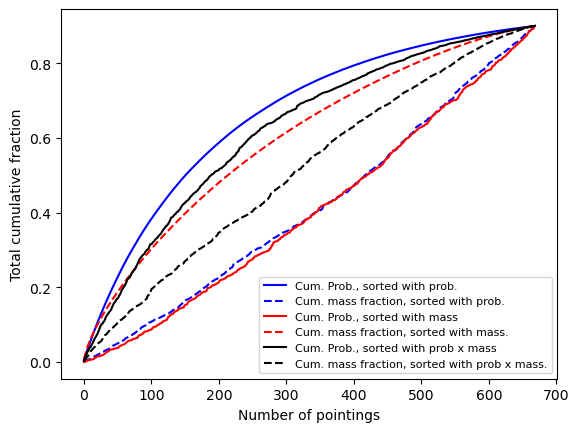

In [11]:
plt.plot(top100_prob['tile_prob'].cumsum(), color='blue', label='Cum. Prob., sorted with prob.')
plt.plot(top100_prob['tile_Mstar'].cumsum()*0.9/skymap_90_fields['tile_Mstar'].sum(), color='blue', 
         linestyle='--', label='Cum. mass fraction, sorted with prob.')

plt.plot(top100_mass['tile_prob'].cumsum(), color='red', label='Cum. Prob., sorted with mass')
plt.plot(top100_mass['tile_Mstar'].cumsum()*0.9/skymap_90_fields['tile_Mstar'].sum(), color='red', 
         linestyle='--', label='Cum. mass fraction, sorted with mass.')

plt.plot(top100_mtp['tile_prob'].cumsum(), color='black', label='Cum. Prob., sorted with prob x mass')
plt.plot(top100_mtp['tile_Mstar'].cumsum()*0.9/skymap_90_fields['tile_Mstar'].sum(), color='black', 
         linestyle='--', label='Cum. mass fraction, sorted with prob x mass.')

plt.xlabel('Number of pointings')
plt.ylabel('Total cumulative fraction')
plt.legend(fontsize=8)

In [19]:
catalog_file = "./data/NEDLVS_20210922_v2_modified.fits"
# skymapfile = "./extra/S230518h_rev2_Bilby.multiorder.fits,0_flattened.fits.gz"
skymapfile = "./extra/bns_200Mpc_data_flattened.fits.gz"
telescope = "WINTER"
configfile = "./palomar_telescope_configurations/"+telescope+"_config.ini"
gal_obj = galaxy_informed_tiling.GalaxyTileGenerator(configfile, skymapfile=skymapfile, outdir='./')
df_galaxy_targeted = gal_obj.get_galaxy_targeted_tiles(cat, "WINTER", save_csv=True, save_crossmatched_csv=True)
df_galaxy_targeted


,tile_index,objname,P_Mstar,RA,Dec
0,27421.0,WISEA J172713.10+185011.0,0.002545,262.193376,19.0
1,30394.0,WISEA J181617.32+273151.4,0.002085,273.893717,28.0
2,35778.0,WISEA J180645.27+472554.4,0.001787,271.966971,47.0
3,31336.0,WISEA J183249.43+312718.4,0.001559,277.863821,31.0
4,28779.0,WISEA J184142.44+224654.4,0.001352,280.107657,23.0
...,...,...,...,...,...
9745,31950.0,ALFAZOA J1859+3319,NaN,284.800466,33.0
9746,28784.0,ALFAZOA J1900+2240,NaN,285.539459,23.0
9748,30086.0,ALFAZOA J1901+2647,NaN,285.395285,27.0
9753,31952.0,ALFAZOA J1907+3229,NaN,287.185193,33.0
